In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score
from matplotlib.animation import FuncAnimation

Initial shapes:
Train: X=(37754, 784), Y=(37754,)
Test: X=(3000, 784)


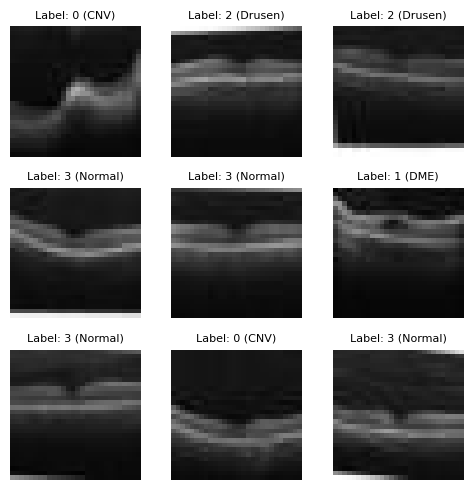

In [22]:
# Load data
data = np.load('advanced_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

print(f'Initial shapes:')
print(f'Train: X={X_train.shape}, Y={Y_train.shape}')
print(f'Test: X={X_test.shape}')

# Display sample images with labels
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

Gaussian blur

In [23]:
def gaussian_kernel(size, sigma=1):
    """Generates a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(- ((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel

def convolve2d(image, kernel):
    """Applies a 2D convolution to the image using the specified kernel."""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # Padding the image to handle borders
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Create an output array
    output = np.zeros_like(image)

    # Convolution operation
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(
                kernel * padded_image[i:i + kernel_height, j:j + kernel_width]
            )
    
    return output

def gaussian_blur(image, kernel_size=5, sigma=1):
    """Applies Gaussian blur to an image."""
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolve2d(image, kernel)

In [24]:
print(X_train[:9].shape)
blurred_image = gaussian_blur(X_train[:9], kernel_size=5, sigma=1)
print(blurred_image.shape)
print(type(X_train[:9]))
print(type(blurred_image))

(9, 784)
(9, 784)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


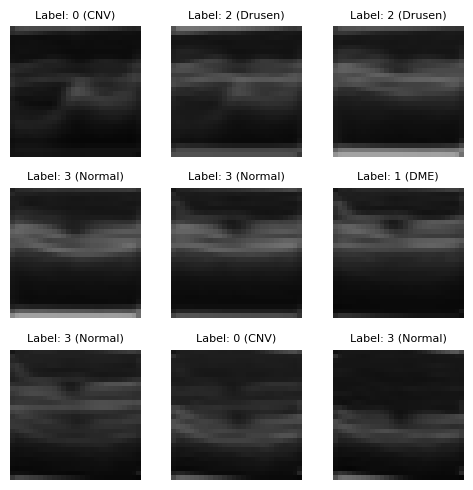

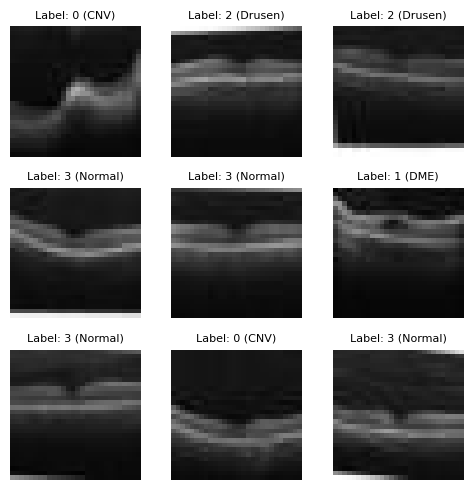

In [25]:
# X_train[i].reshape(28, 28)
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(blurred_image[i].reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
def increase_brightness(X, factor):
    """
    Increase the brightness of the images in the array X.

    Parameters:
    X -- input images as a 4D NumPy array of shape (num_images, height, width, channels)
    factor -- value to add to each pixel (positive value increases brightness)

    Returns:
    brightened_images -- the brightened images
    """
    # 确保输入图像是 NumPy 数组
    X = np.array(X)

    # 增加亮度
    brightened_images = X + factor

    # 限制值在 0 到 255 之间
    brightened_images = np.clip(brightened_images, 0, 255)

    return brightened_images.astype(X.dtype)  # 确保返回与原图相同的数据类型

# 示例：假设 X 是形状为 (num_images, 28, 28) 的灰度图像数组
# 或者形状为 (num_images, 28, 28, 3) 的 RGB 图像数组
brightened_images = increase_brightness(X_train[:9], factor=50)


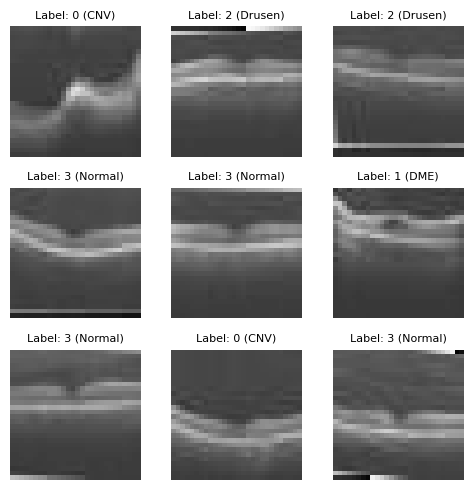

In [27]:
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(brightened_images[i].reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
import numpy as np

def increase_contrast(X, factor):
    """
    Increase the contrast of the images in the array X.

    Parameters:
    X -- input images as a 2D NumPy array of shape (num_samples, 784)
    factor -- contrast increase factor (1 means no change)

    Returns:
    contrasted_images -- the contrasted images as a 2D NumPy array
    """
    # 确保输入图像是 NumPy 数组
    X = np.array(X)

    # 计算每张图像的平均亮度
    mean = np.mean(X, axis=1, keepdims=True)

    # 调整对比度
    contrasted_images = (X - mean) * factor + mean

    # 限制值在 0 到 255 之间，并转换为整数
    contrasted_images = np.clip(contrasted_images, 0, 255).astype(np.uint8)

    return contrasted_images

# 示例：假设 X 是形状为 (num_samples, 784) 的灰度图像数组
contrasted_images = increase_contrast(X_train, factor=2)  # 增加对比度


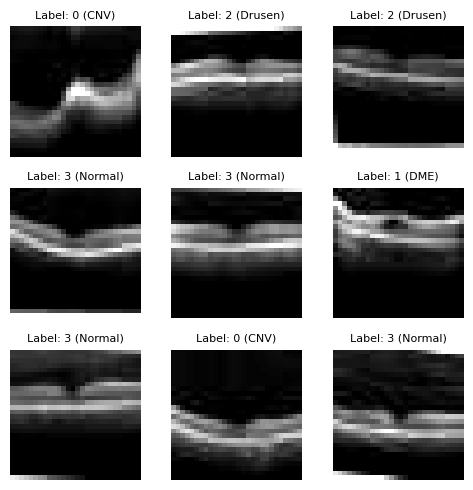

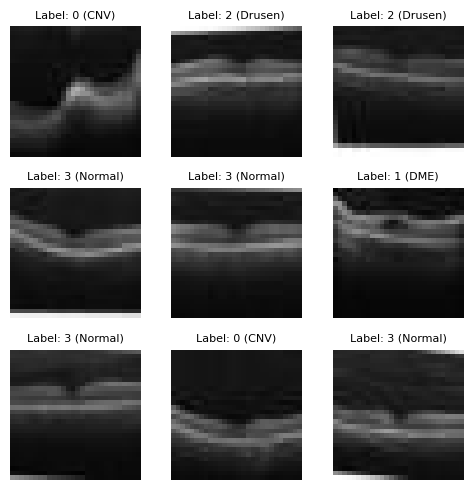

In [29]:
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(contrasted_images[i].reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()
# Display sample images with labels
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
print(contrasted_images)

[[ 20  22  26 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 ...
 [ 14  12  12 ... 248 228 212]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [31]:
print(X_train)

[[ 26  27  29 ...   8   7   7]
 [255 255 254 ...   8   8   8]
 [ 25  25  25 ... 255 255 255]
 ...
 [ 35  34  34 ... 152 142 134]
 [255 255 255 ...  43  42  41]
 [255 255 255 ...   9   9   9]]


In [32]:
print(X_test)

[[ 27  28  29 ...  11  11  11]
 [ 58  61  66 ...  11  11  10]
 [ 81  75  74 ...  21  23  25]
 ...
 [232 224 212 ... 164 178 188]
 [ 59  52  45 ...   7   7   7]
 [ 15  15  16 ...   5   5   5]]


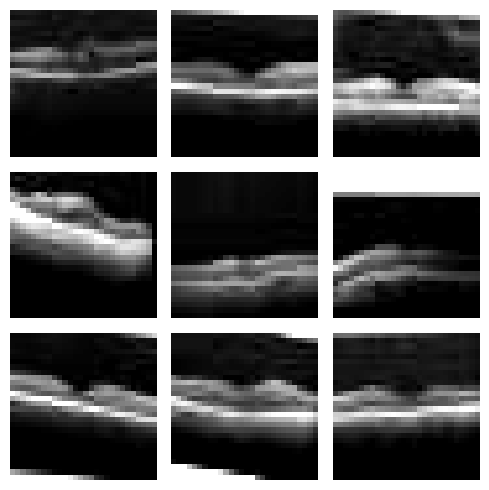

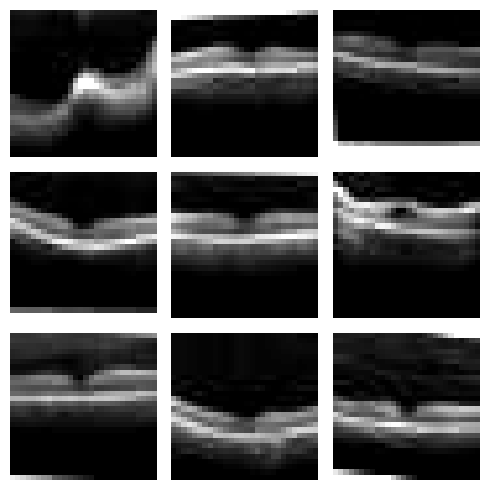

In [34]:
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
contrasted_test = increase_contrast(X_test, factor=2)  # 增加对比度
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(contrasted_test[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    # plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    # plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(contrasted_images[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    # plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    # plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()